# Lesson 3: Building an Agent Reasoning Loop

## Setup

In [3]:
from helper import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()

In [4]:
import nest_asyncio
nest_asyncio.apply()

## Load the data

To download this paper, below is the needed code:

#!wget "https://openreview.net/pdf?id=VtmBAGCN7o" -O metagpt.pdf

**Note**: The pdf file is included with this lesson. To access it, go to the `File` menu and select`Open...`.

## Setup the Query Tools

In [5]:
from utils import get_doc_tools
## We will use tools which we created in L2 . Vector Tool with Metadata filters and Summary tool

vector_tool, summary_tool = get_doc_tools("metagpt.pdf", "metagpt")

## Setup Function Calling Agent

In LLAMA Index - Agent Consist of two main components 

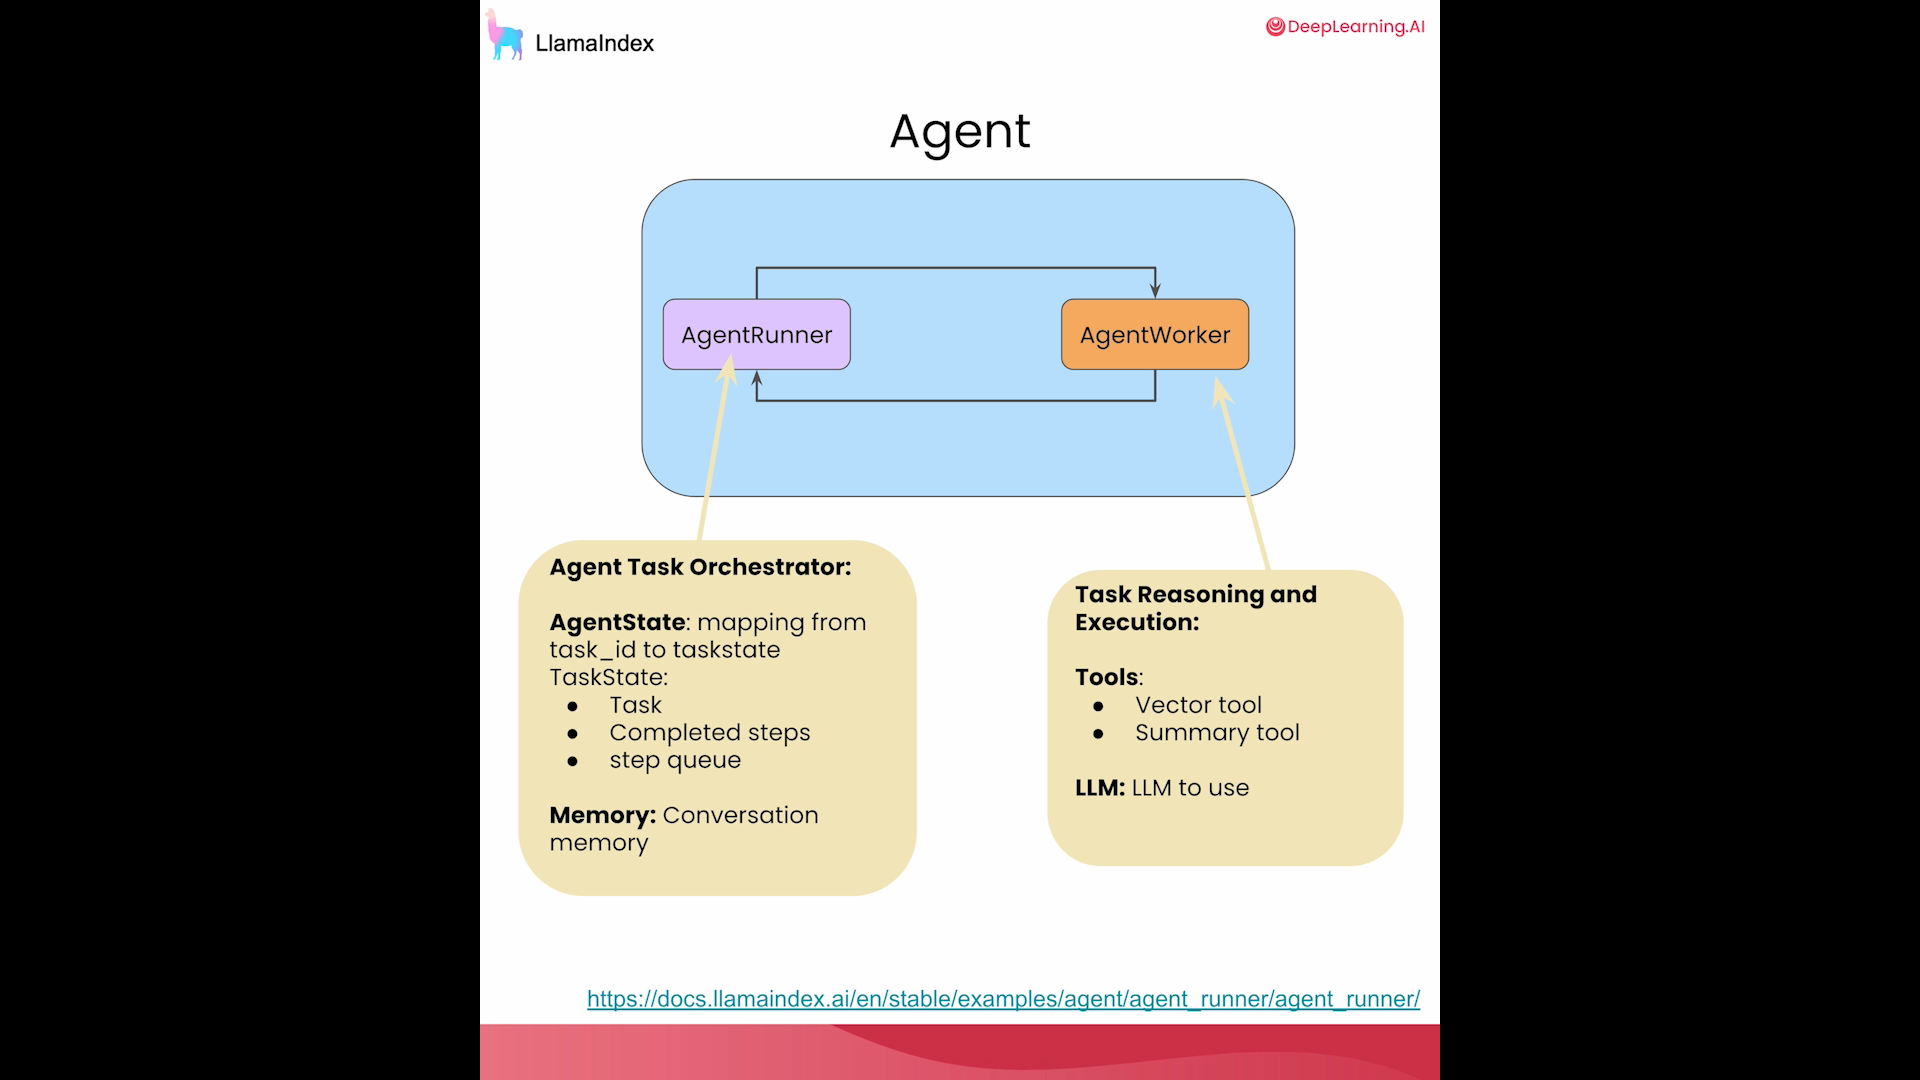

In [6]:
from llama_index.llms.openai import OpenAI

llm = OpenAI(model="gpt-3.5-turbo", temperature=0)

In [7]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_tool, summary_tool], 
    llm=llm, 
    verbose=True
)
agent = AgentRunner(agent_worker)

In [10]:
response = agent.query(
    "Tell me about the agent roles in MetaGPT, "
    "and then how they communicate with each other."
)
'''
So agent is able to break down the question in 2 steps .

1. Asking about Agent Roles 
2. Communication between each other among roles

Since we have used gpt3.5 turbo. Its picking summary tool.Ideally vector tool should be picked.
However if we use advanced model like gpt4 . It will pick vector tool

'''

Added user message to memory: Tell me about the agent roles in MetaGPT, and then how they communicate with each other.
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "agent roles in MetaGPT"}
=== Function Output ===
The agent roles in MetaGPT include Product Manager, Architect, Project Manager, Engineer, and QA Engineer. The Product Manager is responsible for analyzing user requirements and formulating a detailed Product Requirement Document (PRD). The Architect translates requirements into system design components. The Project Manager handles task distribution based on the system design. Engineers execute designated classes and functions, while the QA Engineer formulates test cases to ensure code quality. These roles collaborate in a structured workflow to efficiently develop software solutions within the MetaGPT framework.
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "communication between agent roles in Me

In [11]:
print(response.source_nodes[0].get_content(metadata_mode="all"))

page_label: 1
file_name: metagpt.pdf
file_path: metagpt.pdf
file_type: application/pdf
file_size: 16911937
creation_date: 2024-07-15
last_modified_date: 2024-06-24

Preprint
METAGPT: M ETA PROGRAMMING FOR A
MULTI -AGENT COLLABORATIVE FRAMEWORK
Sirui Hong1∗, Mingchen Zhuge2∗, Jonathan Chen1, Xiawu Zheng3, Yuheng Cheng4,
Ceyao Zhang4,Jinlin Wang1,Zili Wang ,Steven Ka Shing Yau5,Zijuan Lin4,
Liyang Zhou6,Chenyu Ran1,Lingfeng Xiao1,7,Chenglin Wu1†,J¨urgen Schmidhuber2,8
1DeepWisdom,2AI Initiative, King Abdullah University of Science and Technology,
3Xiamen University,4The Chinese University of Hong Kong, Shenzhen,
5Nanjing University,6University of Pennsylvania,
7University of California, Berkeley,8The Swiss AI Lab IDSIA/USI/SUPSI
ABSTRACT
Remarkable progress has been made on automated problem solving through so-
cieties of agents based on large language models (LLMs). Existing LLM-based
multi-agent systems can already solve simple dialogue tasks. Solutions to more
complex tasks, however, 

#### Instead of Agent we can also use chat . Which in turn uses memory 

In [12]:
response = agent.chat(
    "Tell me about the evaluation datasets used."
)

Added user message to memory: Tell me about the evaluation datasets used.
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "evaluation datasets used in MetaGPT"}
=== Function Output ===
The evaluation datasets used in MetaGPT include HumanEval, MBPP, and SoftwareDev. HumanEval comprises 164 handwritten programming tasks, MBPP includes 427 Python tasks, and SoftwareDev consists of 70 diverse software development tasks with detailed prompts for 11 tasks.
=== LLM Response ===
The evaluation datasets used in MetaGPT include HumanEval, MBPP, and SoftwareDev. HumanEval consists of 164 handwritten programming tasks, MBPP includes 427 Python tasks, and SoftwareDev comprises 70 diverse software development tasks with detailed prompts for 11 tasks.


In [13]:
response = agent.chat("Tell me the results over one of the above datasets.")

Added user message to memory: Tell me the results over one of the above datasets.
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "results over HumanEval dataset", "page_numbers": ["6"]}
=== Function Output ===
The results over the HumanEval dataset were part of the experimental setting in the research.
=== LLM Response ===
The results over the HumanEval dataset were part of the experimental setting in the research. If you need more specific details or analysis on the results, feel free to ask!


## Lower-Level: Debuggability and Control

In [14]:
agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_tool, summary_tool], 
    llm=llm, 
    verbose=True
)
agent = AgentRunner(agent_worker)

In [21]:
task = agent.create_task(
    "Tell me about the agent roles in MetaGPT, "
    "and then how they communicate with each other."
)

In [22]:
step_output = agent.run_step(task.task_id)

Added user message to memory: Tell me about the agent roles in MetaGPT, and then how they communicate with each other.
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "agent roles in MetaGPT"}
=== Function Output ===
The agent roles in MetaGPT include Product Manager, Architect, Project Manager, Engineer, and QA Engineer. Each role has specific responsibilities and expertise within the collaborative framework, contributing to the software development process in a structured and sequential manner. The Product Manager conducts business-oriented analysis, the Architect translates requirements into system design components, the Project Manager handles task distribution, the Engineer executes code based on the design, and the QA Engineer formulates test cases to ensure code quality. These roles work together following Standard Operating Procedures (SOPs) to efficiently tackle complex tasks in software development.


In [23]:
completed_steps = agent.get_completed_steps(task.task_id)
print(f"Num completed for task {task.task_id}: {len(completed_steps)}")
print(completed_steps[0].output.sources[0].raw_output)

Num completed for task 665fbb7e-9923-44fb-b6c2-a84f343f5c83: 1
The agent roles in MetaGPT include Product Manager, Architect, Project Manager, Engineer, and QA Engineer. Each role has specific responsibilities and expertise within the collaborative framework, contributing to the software development process in a structured and sequential manner. The Product Manager conducts business-oriented analysis, the Architect translates requirements into system design components, the Project Manager handles task distribution, the Engineer executes code based on the design, and the QA Engineer formulates test cases to ensure code quality. These roles work together following Standard Operating Procedures (SOPs) to efficiently tackle complex tasks in software development.


In [24]:
upcoming_steps = agent.get_upcoming_steps(task.task_id)
print(f"Num upcoming steps for task {task.task_id}: {len(upcoming_steps)}")
upcoming_steps[0]

Num upcoming steps for task 665fbb7e-9923-44fb-b6c2-a84f343f5c83: 1


TaskStep(task_id='665fbb7e-9923-44fb-b6c2-a84f343f5c83', step_id='d532fdc9-0eeb-44d1-9211-e70d552775a0', input=None, step_state={}, next_steps={}, prev_steps={}, is_ready=True)

Now we will inject our agent with new input "What about how agents share information?".

SO this input was not the part of original task query , But by injecting this . This will modify agent execution to give you back the result.

In [25]:
step_output = agent.run_step(
    task.task_id, input="What about how agents share information?"
)

Added user message to memory: What about how agents share information?
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "how agents share information in MetaGPT"}
=== Function Output ===
Agents in MetaGPT share information through a structured communication protocol that includes a shared message pool. This pool allows agents to publish structured messages and subscribe to relevant messages based on their profiles. By utilizing this communication interface, agents can efficiently exchange directional information and public information from the environment. Additionally, agents can access past messages stored in memory to compare them with various components like the Product Requirements Document (PRD), system design, and code files for error-checking and validation. The shared message pool enables transparent information exchange without the need for one-to-one communication, and agents can extract task-related information based on their role-specifi

In [26]:
step_output = agent.run_step(task.task_id)
print(step_output.is_last)

=== LLM Response ===
Agents in MetaGPT share information through a structured communication protocol that includes a shared message pool. This pool allows agents to publish structured messages and subscribe to relevant messages based on their profiles. By utilizing this communication interface, agents can efficiently exchange directional information and public information from the environment. Additionally, agents can access past messages stored in memory to compare them with various components like the Product Requirements Document (PRD), system design, and code files for error-checking and validation. The shared message pool enables transparent information exchange without the need for one-to-one communication, and agents can extract task-related information based on their role-specific interests to avoid distractions from irrelevant details. This approach facilitates efficient sharing of information among agents within the simulated software company framework in MetaGPT.
True


In [27]:
response = agent.finalize_response(task.task_id)

In [28]:
print(str(response))

assistant: Agents in MetaGPT share information through a structured communication protocol that includes a shared message pool. This pool allows agents to publish structured messages and subscribe to relevant messages based on their profiles. By utilizing this communication interface, agents can efficiently exchange directional information and public information from the environment. Additionally, agents can access past messages stored in memory to compare them with various components like the Product Requirements Document (PRD), system design, and code files for error-checking and validation. The shared message pool enables transparent information exchange without the need for one-to-one communication, and agents can extract task-related information based on their role-specific interests to avoid distractions from irrelevant details. This approach facilitates efficient sharing of information among agents within the simulated software company framework in MetaGPT.
